In [2]:
import pandas as pd
import numpy as np
from sklearn. preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
##데이터를 구성하는 패키지
import pandas as pd
##데이터 행렬 연산 패키지
import numpy as np
##데이터 시각화를 위한 패키지
import matplotlib.pyplot as plt
##시각화 패키지
import seaborn as sns
##통계분석 패키지
import scipy.stats as stats
##회귀분석 패키지
from statsmodels.formula.api import ols
##선형 모델 패키지(절편 추가 위함)
import statsmodels.api as sm
##평가함수 패키지
from statsmodels.tools.eval_measures import rmse
##jupyter notebook 사용시 그래프 자동 출력 옵션
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale, robust_scale, minmax_scale
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
matplotlib.rc("font", family = "NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False

In [89]:
ds_iron = pd.read_excel("./data.xlsx", sheet_name = "종실2.SCALE불량", seb = ",")
ds_iron.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [90]:
ds_iron1 = ds_iron.drop(["PLATE_NO", "ROLLING_DATE"], axis = 1, inplace = False)
ds_iron1.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조


In [80]:
ds_iron1["SCALE"].replace(to_replace = "양품", value = 0, inplace = True)
ds_iron1["SCALE"].replace(to_replace = "불량", value = 1, inplace = True)

In [6]:
ds_iron1.isnull().sum()

SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

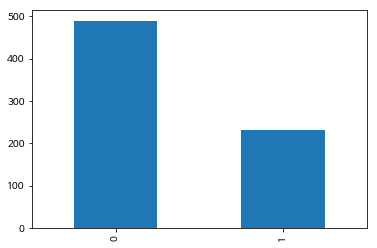

In [7]:
ds_iron_count = ds_iron1["SCALE"].value_counts()
ds_iron_count.sort_index(inplace = True)
ds_iron_count.plot.bar()

In [91]:
ds_iron_num = ds_iron1.drop(["SCALE", "SPEC", "STEEL_KIND", "FUR_NO","HSB", "WORK_GR"], axis = 1, inplace = False)
ds_iron_num.head()
ds_iron_num.shape

(720, 13)

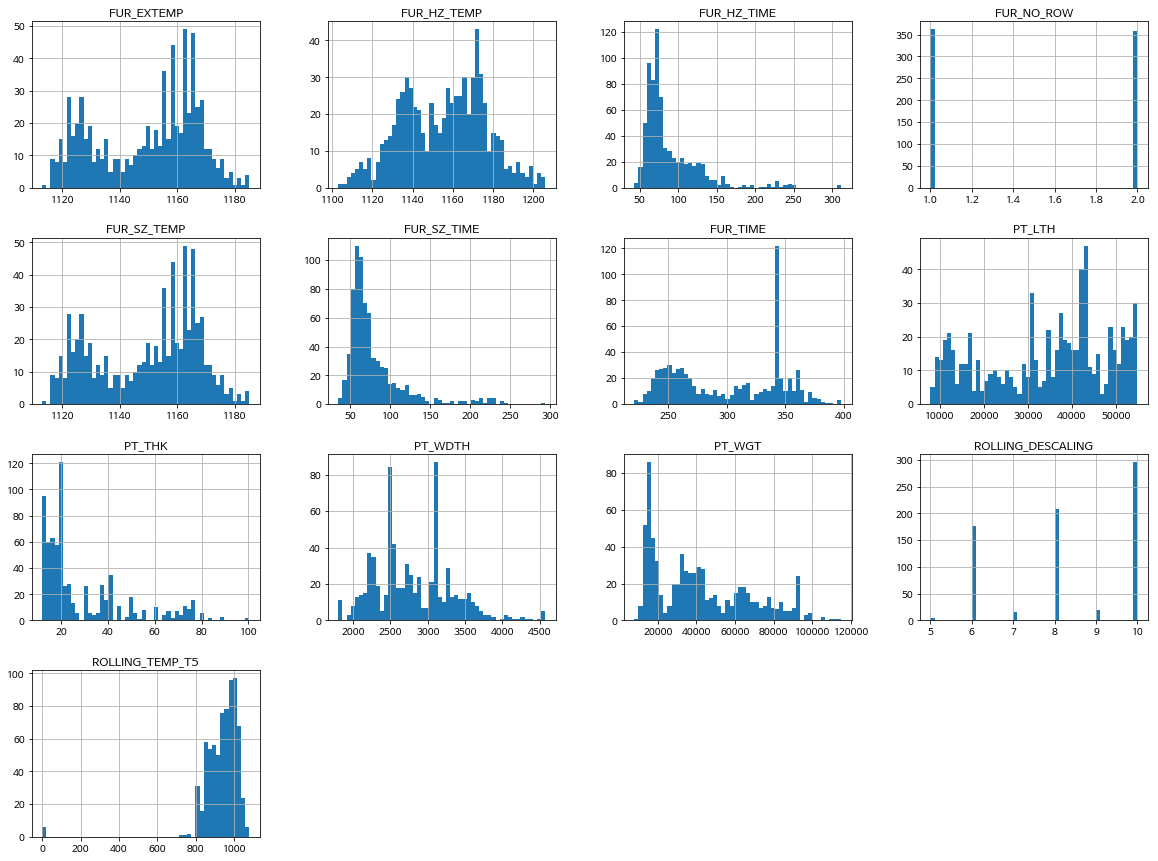

In [13]:
ds_iron_num.hist(bins = 50, figsize = (20, 15))
plt.show()

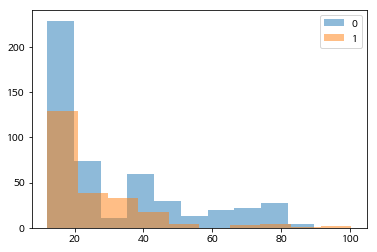

In [11]:
##ds_iron_x = ds_iron1.drop("SCALE", axis = 1, inplace = False)

plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["PT_THK"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["PT_THK"], label = 1, alpha = 0.5)
plt.legend()

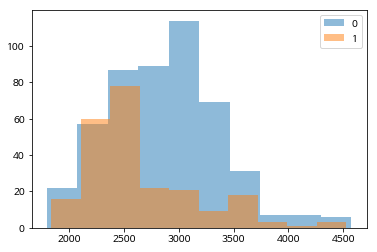

In [14]:
plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["PT_WDTH"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["PT_WDTH"], label = 1, alpha = 0.5)
plt.legend()

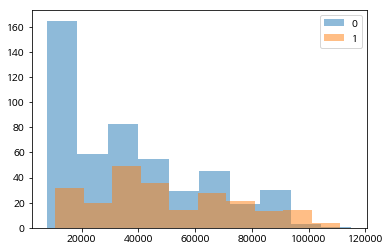

In [17]:
plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["PT_WGT"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["PT_WGT"], label = 1, alpha = 0.5)
plt.legend()

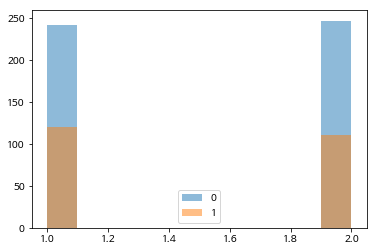

In [18]:
plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["FUR_NO_ROW"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["FUFUR_HZ_TIMER_NO_ROW"], label = 1, alpha = 0.5)
plt.legend()

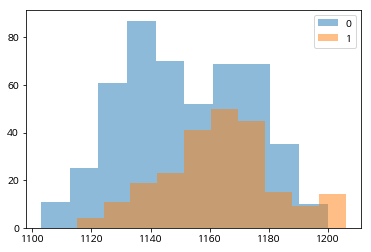

In [19]:
plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["FUR_HZ_TEMP"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["FUR_HZ_TEMP"], label = 1, alpha = 0.5)
plt.legend()

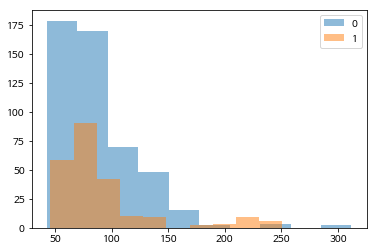

In [20]:
plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["FUR_HZ_TIME"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["FUR_HZ_TIME"], label = 1, alpha = 0.5)
plt.legend()

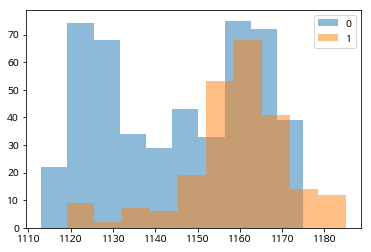

In [21]:
plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["FUR_SZ_TEMP"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["FUR_SZ_TEMP"], label = 1, alpha = 0.5)
plt.legend()

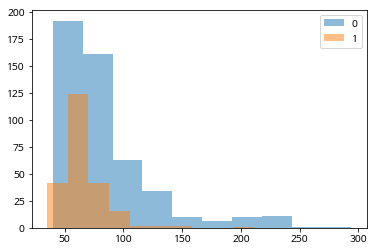

In [22]:
plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["FUR_SZ_TIME"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["FUR_SZ_TIME"], label = 1, alpha = 0.5)
plt.legend()

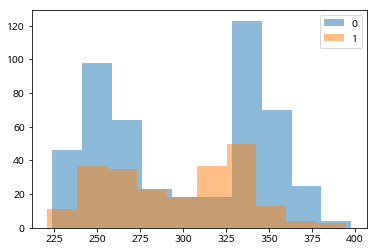

In [23]:
plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["FUR_TIME"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["FUR_TIME"], label = 1, alpha = 0.5)
plt.legend()

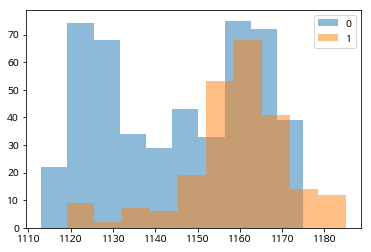

In [24]:
plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["FUR_EXTEMP"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["FUR_EXTEMP"], label = 1, alpha = 0.5)
plt.legend()

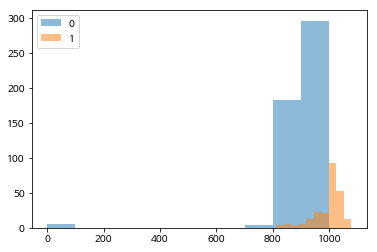

In [25]:
plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["ROLLING_TEMP_T5"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["ROLLING_TEMP_T5"], label = 1, alpha = 0.5)
plt.legend()

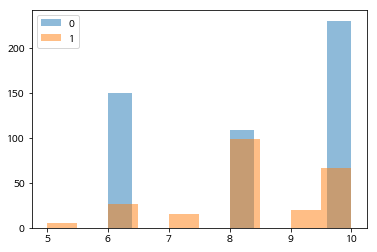

In [26]:
plt.hist(ds_iron1[ds_iron1["SCALE"] == 0]["ROLLING_DESCALING"], label = 0, alpha = 0.5)
plt.hist(ds_iron1[ds_iron1["SCALE"] == 1]["ROLLING_DESCALING"], label = 1, alpha = 0.5)
plt.legend()axis = 1, inplace = False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3a9f8d470>,
      dtype=object)

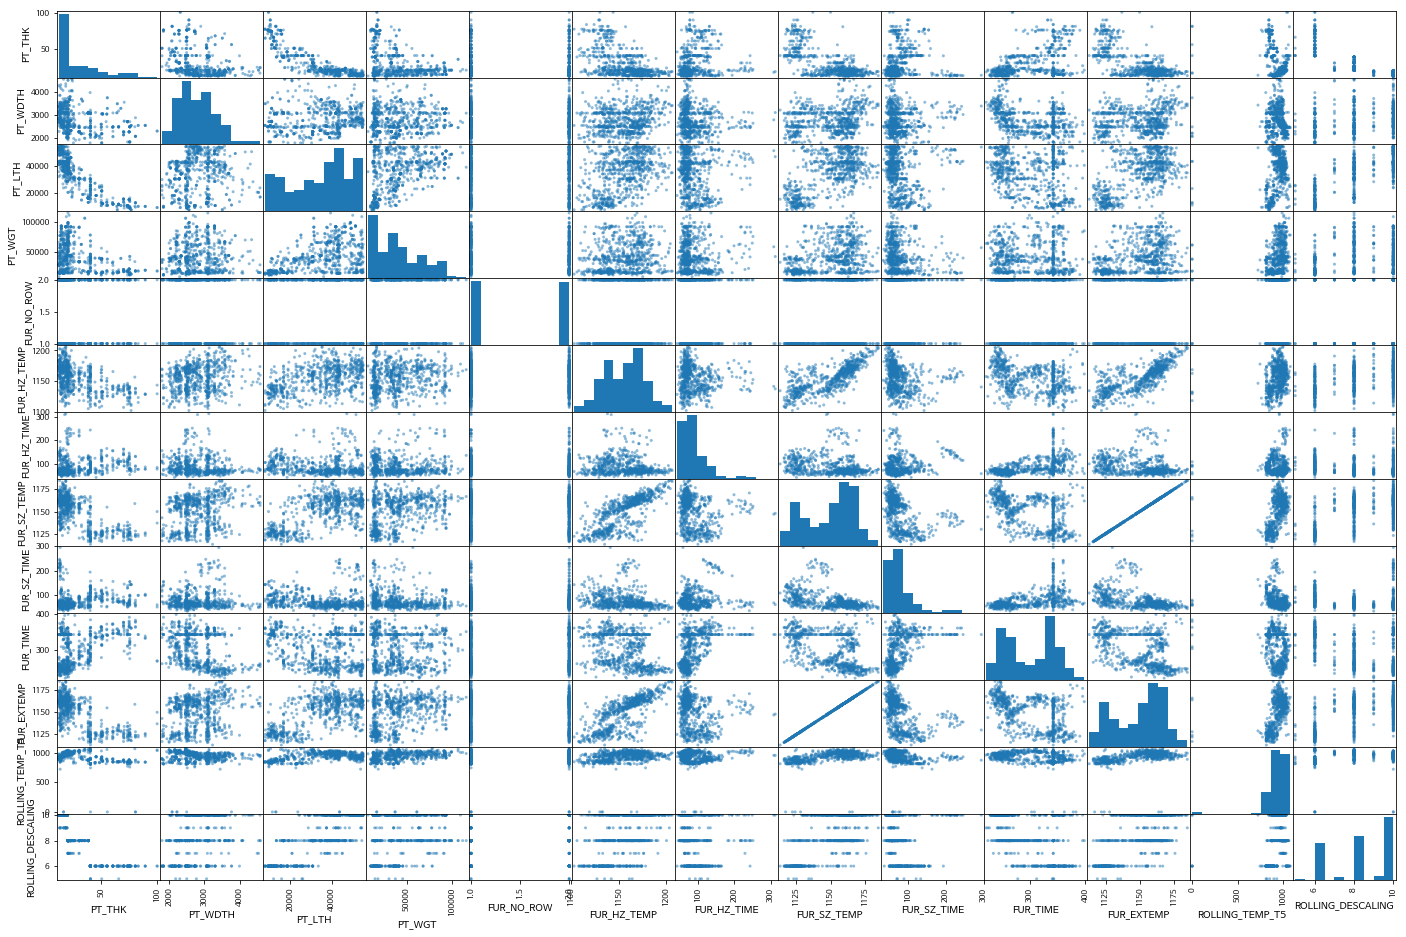

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(ds_iron_num, figsize = (24, 16))

In [30]:
corr_matrix = ds_iron1.corr()
corr_matrix["SCALE"].sort_values(ascending = False)

SCALE                1.000000
ROLLING_TEMP_T5      0.384967
FUR_EXTEMP           0.374809
FUR_SZ_TEMP          0.374809
FUR_HZ_TEMP          0.247670
PT_WGT               0.218741
PT_LTH               0.100475
FUR_HZ_TIME          0.056139
ROLLING_DESCALING   -0.006955
FUR_NO_ROW          -0.022960
FUR_TIME            -0.049214
PT_THK              -0.124858
PT_WDTH             -0.206021
FUR_SZ_TIME         -0.240137
Name: SCALE, dtype: float64

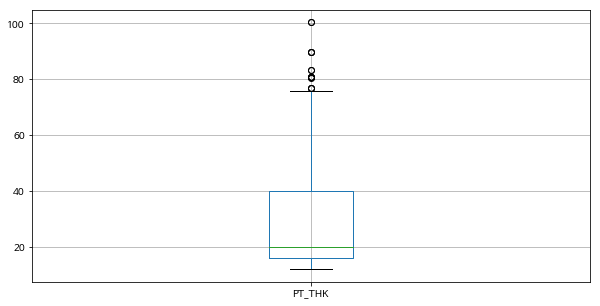

In [47]:
ds_iron_num.boxplot(column = "PT_THK", figsize = (10, 5))

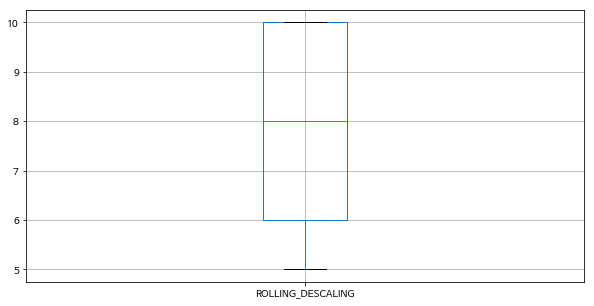

In [48]:
ds_iron_num.boxplot(column = "ROLLING_DESCALING", figsize = (10, 5))

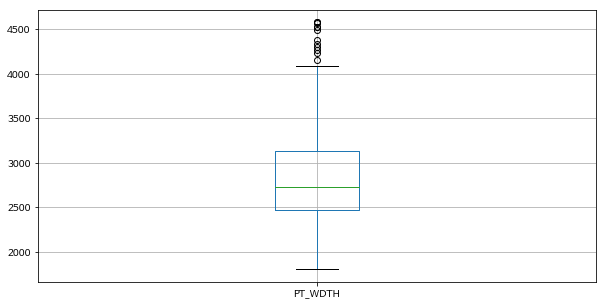

In [51]:
ds_iron_num.boxplot(column = "PT_WDTH", figsize = (10, 5))

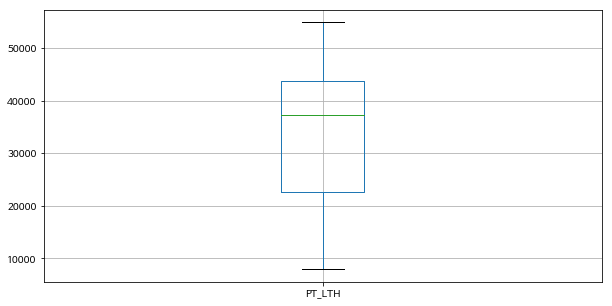

In [52]:
ds_iron_num.boxplot(column = "PT_LTH", figsize = (10, 5))

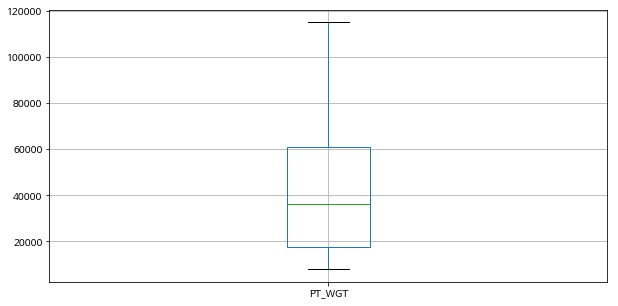

In [53]:
ds_iron_num.boxplot(column = "PT_WGT", figsize = (10, 5))

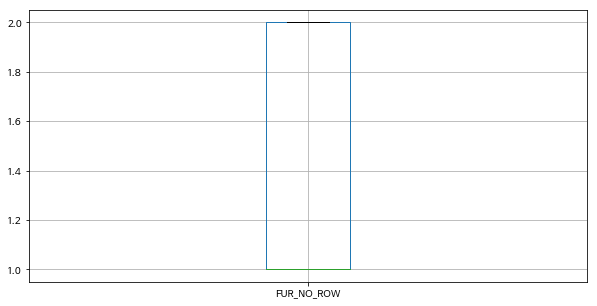

In [57]:
ds_iron_num.boxplot(column = "FUR_NO_ROW", figsize = (10, 5))

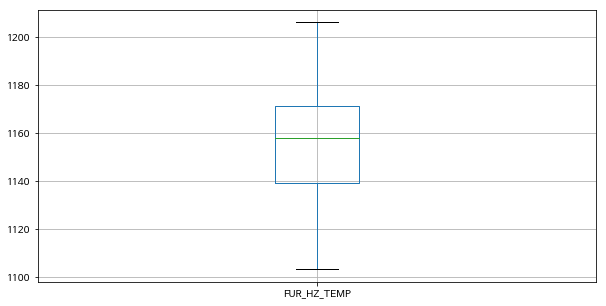

In [58]:
ds_iron_num.boxplot(column = "FUR_HZ_TEMP", figsize = (10, 5))

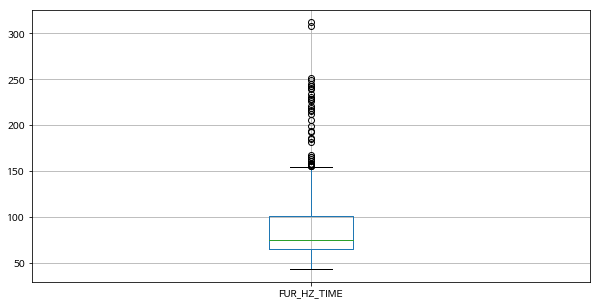

In [59]:
ds_iron_num.boxplot(column = "FUR_HZ_TIME", figsize = (10, 5))

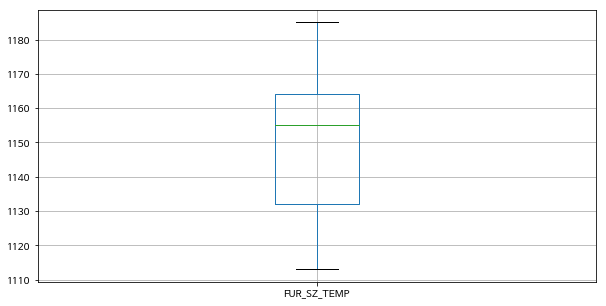

In [60]:
ds_iron_num.boxplot(column = "FUR_SZ_TEMP", figsize = (10, 5))

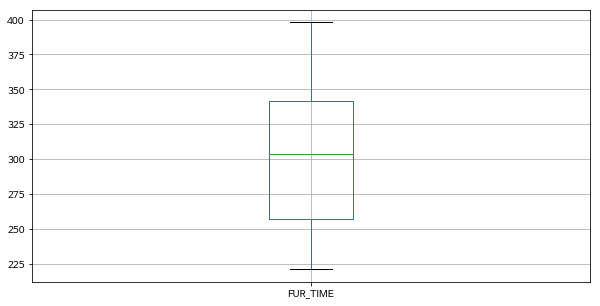

In [61]:
ds_iron_num.boxplot(column = "FUR_TIME", figsize = (10, 5))

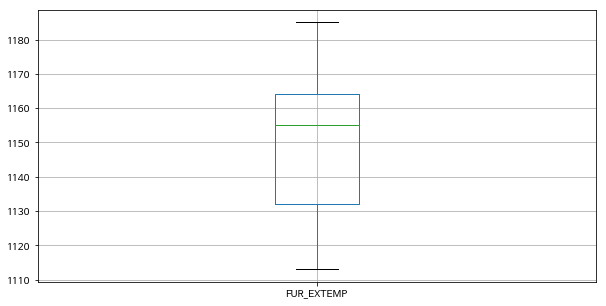

In [62]:
ds_iron_num.boxplot(column = "FUR_EXTEMP", figsize = (10, 5))

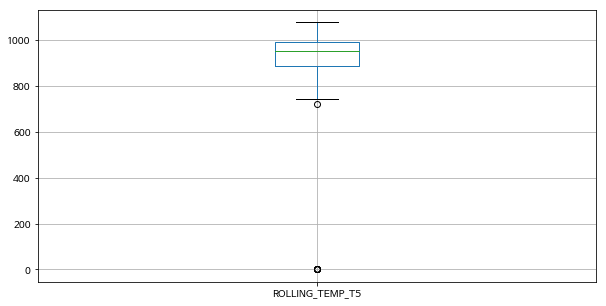

In [63]:
ds_iron_num.boxplot(column = "ROLLING_TEMP_T5", figsize = (10, 5))

In [83]:
# ds_iron_num[[ds_iron_num["ROLLING_TEMP_T5"] < 10]]

In [88]:
ds_iron_num1 = ds_iron_num.drop(ds_iron_num[ds_iron_num["ROLLING_TEMP_T5"] < 10].index, inplace = False)
# ds_iron_num.boxplot(column = "ROLLING_TEMP_T5", figsize = (10, 5))
ds_iron_num1.shape

(714, 13)

In [46]:
ds_scale = scale(ds_iron1)
ds_scale = pd.DataFrame(ds_scale, columns = ds_iron1.columns)
ds_scale.head()

ds_scale_describe = ds_scale.describe()
ds_scale_describe.round(3)
ds_scale.boxplot(figsize = (20, 10))

ValueError: could not convert string to float: 'AB/EH32-TM'

In [ ]:
dia.corr().round(3)

In [ ]:
sns.pairplot(dia)